### 데이터 전처리

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib

cust_df = pd.read_csv("./../data/train_santander.csv",encoding='latin-1')
print('dataset shape:', cust_df.shape)
cust_df.head(3)

dataset shape: (76020, 371)


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.17,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.03,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.77,0


In [2]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [3]:
cust_df.isnull().sum().sum()        # null값 존재하지 않음

0

In [4]:
print(cust_df['TARGET'].value_counts())
unsatisfied_cnt = cust_df[cust_df['TARGET'] == 1].TARGET.count()
total_cnt = cust_df.TARGET.count()
print('unsatisfied 비율은 {0:.2f}'.format((unsatisfied_cnt / total_cnt)))

0    73012
1     3008
Name: TARGET, dtype: int64
unsatisfied 비율은 0.04


In [5]:
cust_df.describe( )

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [6]:
# var3 피처 값 대체 및 ID 피처 드롭
cust_df['var3'].replace(-999999, 2, inplace=True)
cust_df.drop('ID',axis=1 , inplace=True)

# 피처 세트와 레이블 세트분리. 레이블 컬럼은 DataFrame의 맨 마지막에 위치해 컬럼 위치 -1로 분리
X_features = cust_df.iloc[:, :-1]
y_labels = cust_df.iloc[:, -1]
print('피처 데이터 shape:{0}'.format(X_features.shape))


피처 데이터 shape:(76020, 369)


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels,
                                                    test_size=0.2, random_state=0)
train_cnt = y_train.count()
test_cnt = y_test.count()
print('학습 세트 Shape:{0}, 테스트 세트 Shape:{1}'.format(X_train.shape , X_test.shape))

print(' 학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt)
print('\n 테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/test_cnt)

학습 세트 Shape:(60816, 369), 테스트 세트 Shape:(15204, 369)
 학습 세트 레이블 값 분포 비율
0    0.960964
1    0.039036
Name: TARGET, dtype: float64

 테스트 세트 레이블 값 분포 비율
0    0.9583
1    0.0417
Name: TARGET, dtype: float64


### SVM

In [8]:
from sklearn import svm
from sklearn import metrics

In [9]:
# 선형분리 학습
model_svm = svm.SVC(gamma='scale')

In [10]:
model_svm.fit(X_train, y_train)

SVC()

In [13]:
y_pred = model_svm.predict(X_test)

print('SVM: %.2f' % (metrics.accuracy_score(y_pred, y_test) * 100))

SVM: 95.83


In [14]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=['class 0', 'class 1']))

              precision    recall  f1-score   support

     class 0       0.96      1.00      0.98     14570
     class 1       0.00      0.00      0.00       634

    accuracy                           0.96     15204
   macro avg       0.48      0.50      0.49     15204
weighted avg       0.92      0.96      0.94     15204



/opt/homebrew/Caskroom/miniforge/base/envs/pandas_info/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/Caskroom/miniforge/base/envs/pandas_info/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/Caskroom/miniforge/base/envs/pandas_info/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th

In [15]:
from sklearn.metrics import precision_score, recall_score, f1_score

print('SVM Precision : ', precision_score(y_test, y_pred))
print('SVM Recall : ', recall_score(y_test, y_pred))
print('SVM f1 : ', f1_score(y_test, y_pred))

SVM Precision :  0.0
SVM Recall :  0.0
SVM f1 :  0.0


/opt/homebrew/Caskroom/miniforge/base/envs/pandas_info/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/opt/homebrew/Caskroom/miniforge/base/envs/pandas_info/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


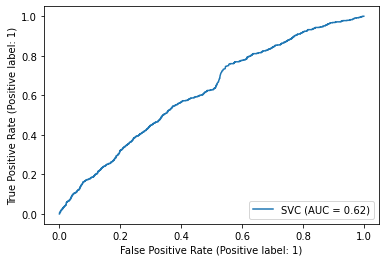

In [17]:
from sklearn.metrics import plot_roc_curve
import matplotlib.pyplot as plt

plot_roc_curve(model_svm, X_test, y_test)
plt.show()

#### 매개변수 바꿔서

In [ ]:
model_svm2 = svm.SVC(kernel='rbf', gamma=0.01 ,C=1)
model_svm2.fit(X_train, y_train)

y_pred = model_svm2.predict(X_test)

print('SVM: %.2f' % (metrics.accuracy_score(y_pred, y_test) * 100))

In [ ]:
print(classification_report(y_test, y_pred, target_names=['class 0', 'class 1']))

### 의사결정트리

In [16]:
from sklearn.tree import DecisionTreeClassifier

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels,
                                                    test_size=0.2, random_state=0)

In [21]:
# max_depth 없이 일단
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)

print(model_dt)

DecisionTreeClassifier()


In [27]:
# depth 두고 확인
model_dt = DecisionTreeClassifier(max_depth=4, random_state=0)
model_dt.fit(X_train, y_train)

print(model_dt)

DecisionTreeClassifier(max_depth=4, random_state=0)


In [28]:
y_pred - model_dt.predict(X_test)

print('DecisionTreeClassifier: %.2f' % (metrics.accuracy_score(y_pred, y_test) * 100))

DecisionTreeClassifier: 95.23


In [29]:
print(classification_report(y_test, y_pred, target_names=['class 0', 'class 1']))

              precision    recall  f1-score   support

     class 0       0.96      0.99      0.98     14570
     class 1       0.21      0.05      0.08       634

    accuracy                           0.95     15204
   macro avg       0.59      0.52      0.53     15204
weighted avg       0.93      0.95      0.94     15204



In [33]:
print('DT Precision : ', precision_score(y_test, y_pred))
print('DT Recall : ', recall_score(y_test, y_pred))
print('DT f1 : ', f1_score(y_test, y_pred))

DT Precision :  0.19753086419753085
DT Recall :  0.050473186119873815
DT f1 :  0.08040201005025126


/opt/homebrew/Caskroom/miniforge/base/envs/pandas_info/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


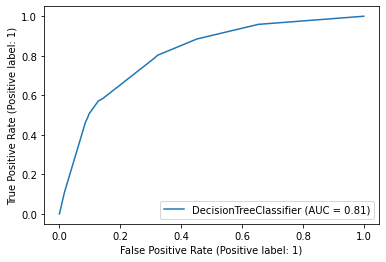

In [31]:
plot_roc_curve(model_dt, X_test, y_test)
plt.show()

### Random Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier

model_forest = RandomForestClassifier(n_estimators=100)
model_forest.fit(X_train, y_train)

y_pred = model_forest.predict(X_test)

print('RandomForestClassifier: %.2f' % (metrics.accuracy_score(y_pred, y_test) * 100))

RandomForestClassifier: 95.19


In [34]:
print(classification_report(y_test, y_pred, target_names=['class 0', 'class 1']))

              precision    recall  f1-score   support

     class 0       0.96      0.99      0.98     14570
     class 1       0.20      0.05      0.08       634

    accuracy                           0.95     15204
   macro avg       0.58      0.52      0.53     15204
weighted avg       0.93      0.95      0.94     15204



In [35]:
print('RF Precision : ', precision_score(y_test, y_pred))
print('RF Recall : ', recall_score(y_test, y_pred))
print('RF f1 : ', f1_score(y_test, y_pred))

RF Precision :  0.19753086419753085
RF Recall :  0.050473186119873815
RF f1 :  0.08040201005025126


/opt/homebrew/Caskroom/miniforge/base/envs/pandas_info/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


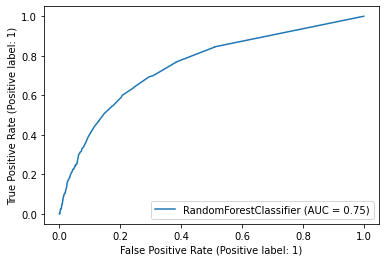

In [36]:
plot_roc_curve(model_forest, X_test, y_test)
plt.show()